 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [182]:
# Import python packages needed for quanatative analysis
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import csv

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [183]:
# In order for python to read the whale_returns csv file we must create a path variable and pass that variable inro our pd.read_csv function. 
# In addition I abbreviated the names of each portfolio.
csvpath = Path("Resources/whale_returns.csv")
whale_returns_data = pd.read_csv(csvpath, parse_dates=True, index_col="Date", infer_datetime_format=True)
abb_columns = ["SFM", "P&CO", "TGM", "BHI"]
whale_returns_data.columns = abb_columns
whale_returns_data.head()

,SFM,P&CO,TGM,BHI
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [184]:
# In this section I used the .isna().sum() functions to count the number of nulls in each portfolio.
whale_returns_data.isna().sum()

SFM     1
P&CO    1
TGM     1
BHI     1
dtype: int64

In [185]:
# After I counted the nulls I used the .dropna() function to purge the data of all nulls.
whale_returns_data = whale_returns_data.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [186]:
# Next I created a algopath variable so that I could pass that variable into the read_csv() funcion and read the data.
algopath = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algopath, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [187]:
# In this section I used the .isnull().sum() functions to count the number of nulls in the algo portfolios.
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [188]:
# After counting the number of nulls in the algo portfolio, I used the .dropna() to drop all nulls.
# Once .dropna() was complted I reused the .isnull().sum() funciton to ensure that all nulls dropped.
algo_returns_data = algo_returns_data.dropna()
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [189]:
# In this section I created a variable for the s&p500 csv and passed that into the read_csv function. I also used the sort_index() function to sort data by date.
sppath = Path("Resources/sp500_history.csv")
sp_data = pd.read_csv(sppath, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp_data = sp_data.sort_index()
sp_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [190]:
# After reading my data in I used the .dtypes() function to see the data type inside the dataframe.
sp_data.dtypes

Close    object
dtype: object

In [191]:
# Upon checking the data types I realized the close column contained a object so I replaced the string $ to a space and changed my data type to a float.
sp_data["Close"] = sp_data["Close"].str.replace("$", "")
sp_data["Close"] = sp_data["Close"].str.replace(",", "")
sp_data["Close"] = sp_data["Close"].astype("float")
sp_data.dtypes

/Users/gomode/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [192]:
# In this section I used the .pct_change() function to mirror the daily returns used in the other data frames. This allowd me to convert the closing prices into daily returns.
daily_return = sp_data.pct_change()
daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [193]:
# Drop nulls
sp_data = daily_return.dropna().copy()
sp_data.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [194]:
# Currently our data reflects the date and respective daily returns of the s&p500. 
#I used the .rename() funciton to change the column name close to s&p500 to specify which portfolio this data refers to.
sp_data = sp_data.rename(columns={"Close": "S&P500"})
sp_data.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [72]:
# In this section I used the .concat funtion to combine all the data I want to perfrom a quantative analyis on.
combined_daily_returns = pd.concat([whale_returns_data, algo_returns_data, sp_data], axis='columns', join='inner')
combined_daily_returns.head()

,SFM,P&CO,TGM,BHI,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

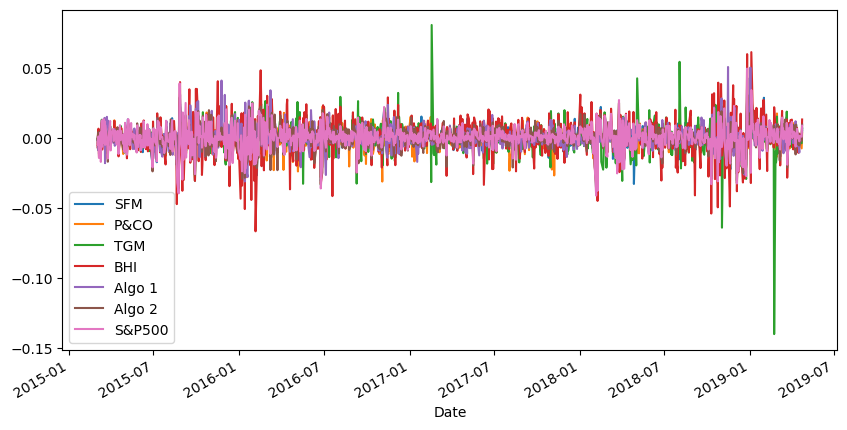

In [73]:
# The .plot funtion allows me to use a library in matplotlib to get a visualization of the daily returns of each portfolio.
combined_daily_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumumaltive Returns of all Portfolios'}, xlabel='Date'>

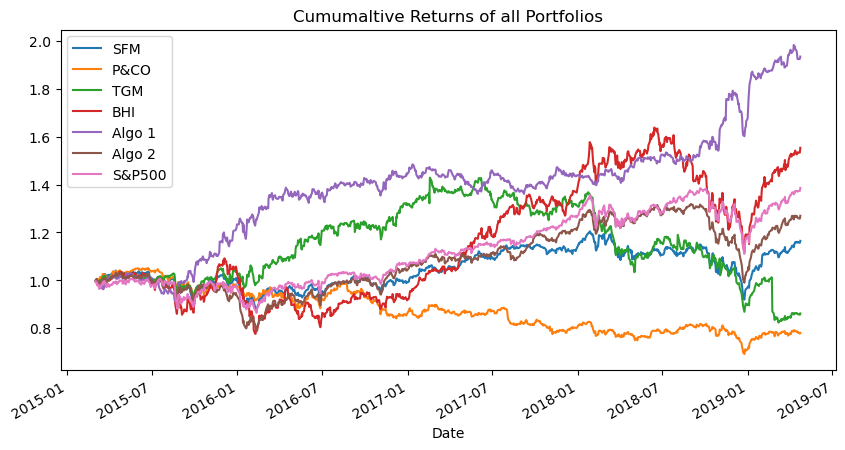

In [74]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumumaltive Returns of all Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

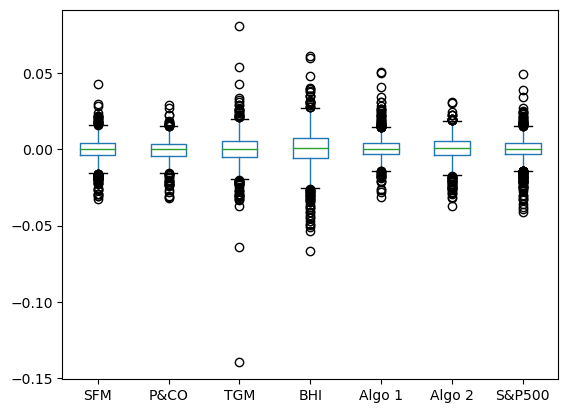

In [75]:
# Box plot to visually show risk
combined_daily_returns.boxplot(grid = False)

### Calculate Standard Deviations

In [76]:
# Calculate the daily standard deviations of all portfolios
combined_daily_returns.std()

SFM       0.007895
P&CO      0.007023
TGM       0.010894
BHI       0.012919
Algo 1    0.007620
Algo 2    0.008342
S&P500    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [77]:
# Calculate  the daily standard deviation of S&P 500
sp5_risk = combined_daily_returns["S&P500"].std()
# Determine which portfolios are riskier than the S&P 500
combined_daily_returns.std() > sp5_risk

SFM       False
P&CO      False
TGM        True
BHI        True
Algo 1    False
Algo 2    False
S&P500    False
dtype: bool

### Calculate the Annualized Standard Deviation

In [78]:
# Calculate the annualized standard deviation (252 trading days)
annualized_volatility = combined_daily_returns.std() * np.sqrt(252)
annualized_volatility

SFM       0.125335
P&CO      0.111488
TGM       0.172936
BHI       0.205077
Algo 1    0.120967
Algo 2    0.132430
S&P500    0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

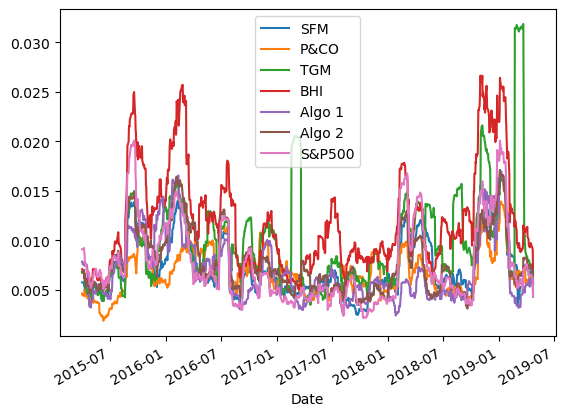

In [79]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_daily_returns.rolling(window=21).std().plot()
# Plot the rolling standard deviation



### Calculate and plot the correlation

<AxesSubplot:>

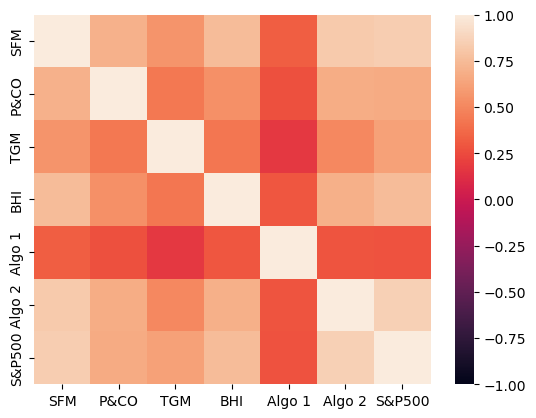

In [175]:
# Calculate the correlation
import seaborn as sns
price_correlation = combined_daily_returns.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-day Beta of Algo 2'}, xlabel='Date'>

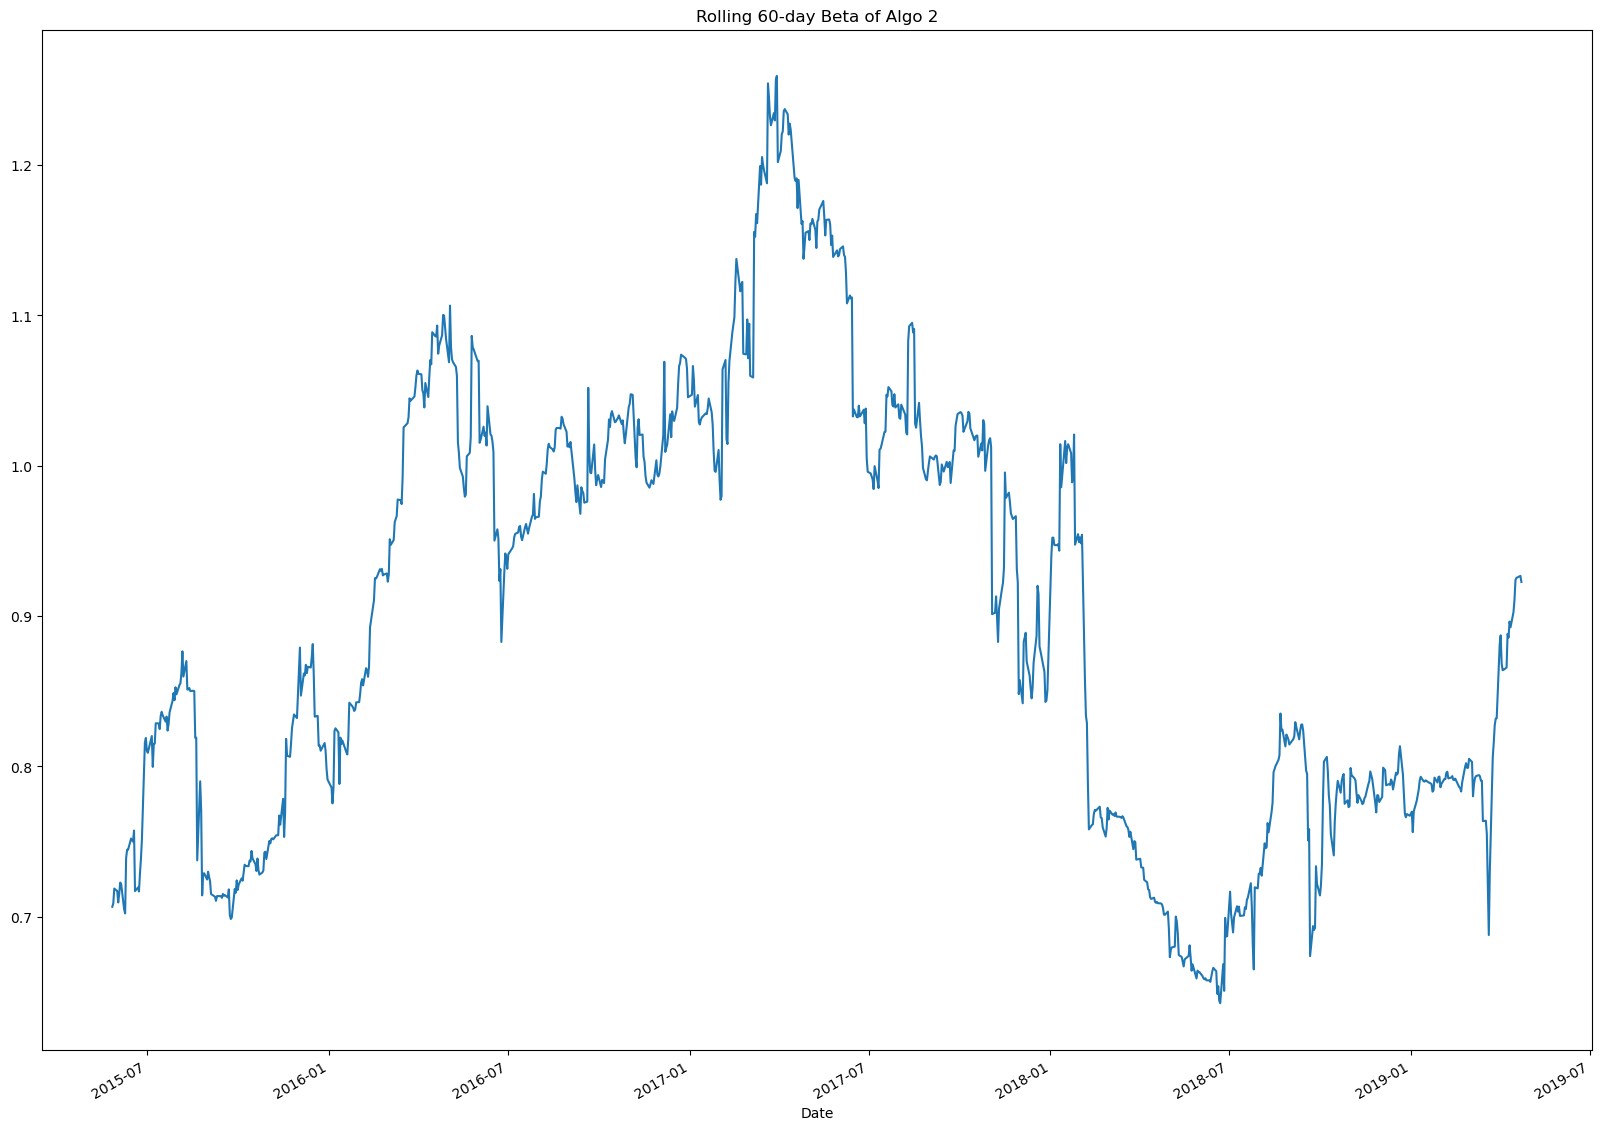

In [81]:
# Calculate covariance of a single portfolio
covariance = combined_daily_returns["Algo 2"].cov(combined_daily_returns["S&P500"])
covariance
# Calculate variance of S&P 500
variance = combined_daily_returns["S&P500"].var()
variance
# Computing beta
algo2_beta = covariance / variance
rolling_covariance = combined_daily_returns["Algo 2"].rolling(window=60).cov(combined_daily_returns["S&P500"])
rolling_variance = combined_daily_returns["S&P500"].rolling(window=60).var()
# Plot beta trend
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,15), title="Rolling 60-day Beta of Algo 2")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Rolling 21-Day EWM'}, xlabel='Date'>

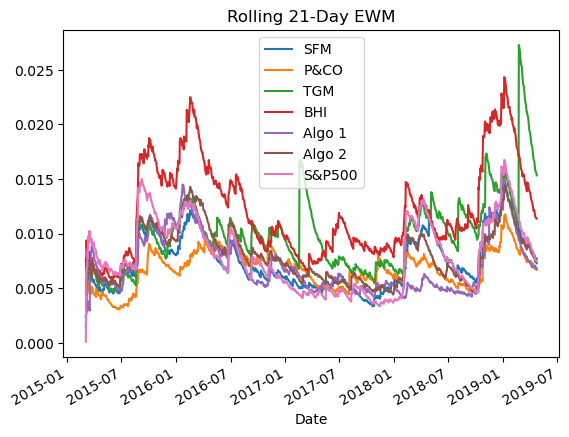

In [82]:
# Use `ewm` to calculate the rolling window
combined_daily_returns.ewm(halflife=21).std().plot(title="Rolling 21-Day EWM")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [83]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_daily_returns.mean() * 252) / (annualized_volatility)
sharpe_ratio.head(7)

SFM       0.356417
P&CO     -0.483570
TGM      -0.121060
BHI       0.621810
Algo 1    1.378648
Algo 2    0.501364
S&P500    0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

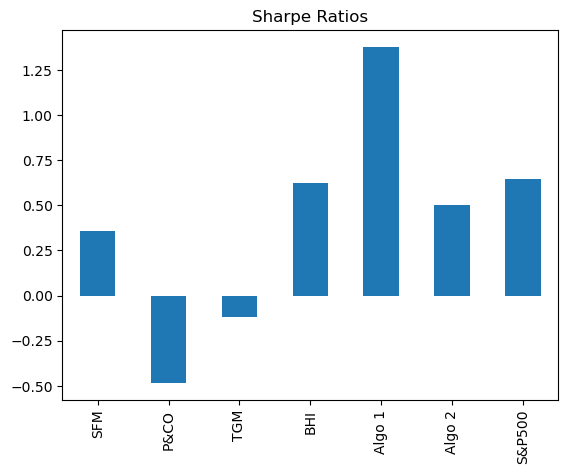

In [84]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the sharpe ratio of each portfolio we can determine that algorithmic 1 strategy outperformed both the market and the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [158]:
# Reading data from 1st stock
acn_path = Path("Resources/acn_return2.csv")
accenture_data = pd.read_csv(acn_path, parse_dates=True, index_col="Date", infer_datetime_format=True).rename(columns={"Close": "ACN"})


In [159]:
# Reading data from 2nd stock
amd_path = Path("Resources/amd_return2.csv")
amd_return_data = pd.read_csv(amd_path, parse_dates=True, index_col="Date", infer_datetime_format=True).rename(columns={"Close": "AMD"})


In [160]:
# Reading data from 3rd stock
gnrc_path = Path("Resources/gnrc_return2.csv")
gnrc_return_data = pd.read_csv(gnrc_path, parse_dates=True, index_col="Date", infer_datetime_format=True).rename(columns={"Close": "GNRC"})


In [161]:
# Combine all stocks in a single DataFrame
combined_personal_portfolio = pd.concat([accenture_data, amd_return_data, gnrc_return_data], axis='columns', join='inner')
combined_personal_portfolio.sort_index(inplace=True)
combined_personal_portfolio.head()

,ACN,AMD,GNRC
Date,,,
2015-03-03,90.84,3.14,50.01
2015-03-04,90.91,3.05,49.59
2015-03-05,92.05,2.98,49.70
2015-03-06,90.67,2.92,49.14
2015-03-09,90.79,2.93,49.18


In [164]:
# Calculate daily returns
daily_returns_personal = combined_personal_portfolio.pct_change().dropna()

# Display sample data
daily_returns_personal.head()

,ACN,AMD,GNRC
Date,,,
2015-03-04,0.000771,-0.028662,-0.008398
2015-03-05,0.012540,-0.022951,0.002218
2015-03-06,-0.014992,-0.020134,-0.011268
2015-03-09,0.001323,0.003425,0.000814
2015-03-10,-0.030069,-0.003413,-0.001627


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [169]:
# Set weights
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns_personal.dot(weights)
portfolio_returns.head()
# Calculate portfolio return
daily_returns_personal["INFINITE WEALTH"] = portfolio_returns
# Display sample data
daily_returns_personal.head()

,ACN,AMD,GNRC,INFINITE WEALTH
Date,,,,
2015-03-04,0.000771,-0.028662,-0.008398,-0.012097
2015-03-05,0.012540,-0.022951,0.002218,-0.002731
2015-03-06,-0.014992,-0.020134,-0.011268,-0.015465
2015-03-09,0.001323,0.003425,0.000814,0.001854
2015-03-10,-0.030069,-0.003413,-0.001627,-0.011703


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [171]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([combined_daily_returns, daily_returns_personal["INFINITE WEALTH"]], axis='columns', join='inner').dropna()
all_portfolio_returns.head()

,SFM,P&CO,TGM,BHI,Algo 1,Algo 2,S&P500,INFINITE WEALTH
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.012097
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.002731
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.015465
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.001854
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.011703


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [172]:
# Calculate the annualized `std`
annualized_volatility_all = all_portfolio_returns.std() * np.sqrt(252)
annualized_volatility_all

SFM                0.125393
P&CO               0.111517
TGM                0.173019
BHI                0.205146
Algo 1             0.121018
Algo 2             0.132492
S&P500             0.135830
INFINITE WEALTH    0.297130
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

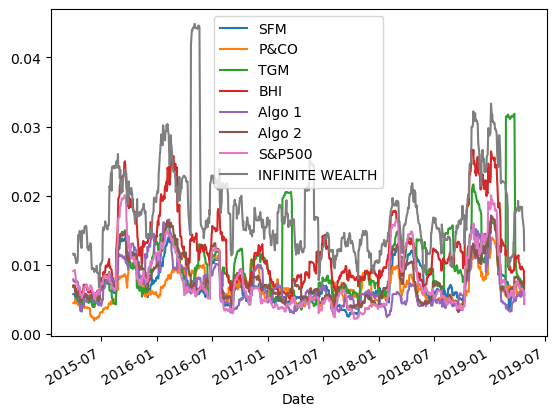

In [173]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
all_portfolio_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

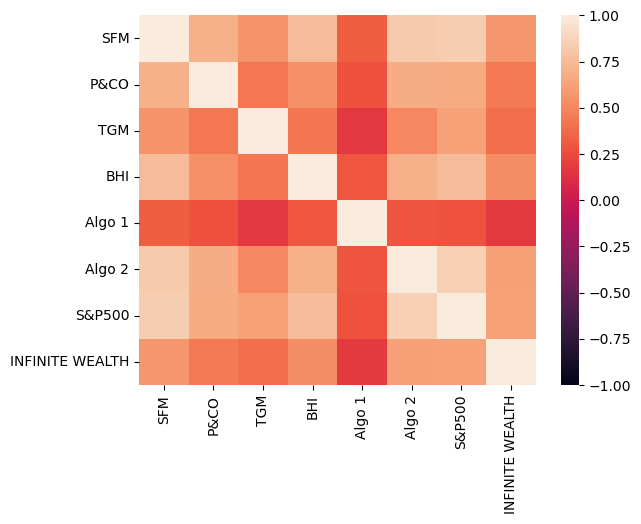

In [176]:
# Calculate and plot the correlation
all_price_correlation = all_portfolio_returns.corr()
sns.heatmap(all_price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

1.356707786903395


<AxesSubplot:title={'center':'Rolling 60-day Beta for INFINITE WEALTH'}, xlabel='Date'>

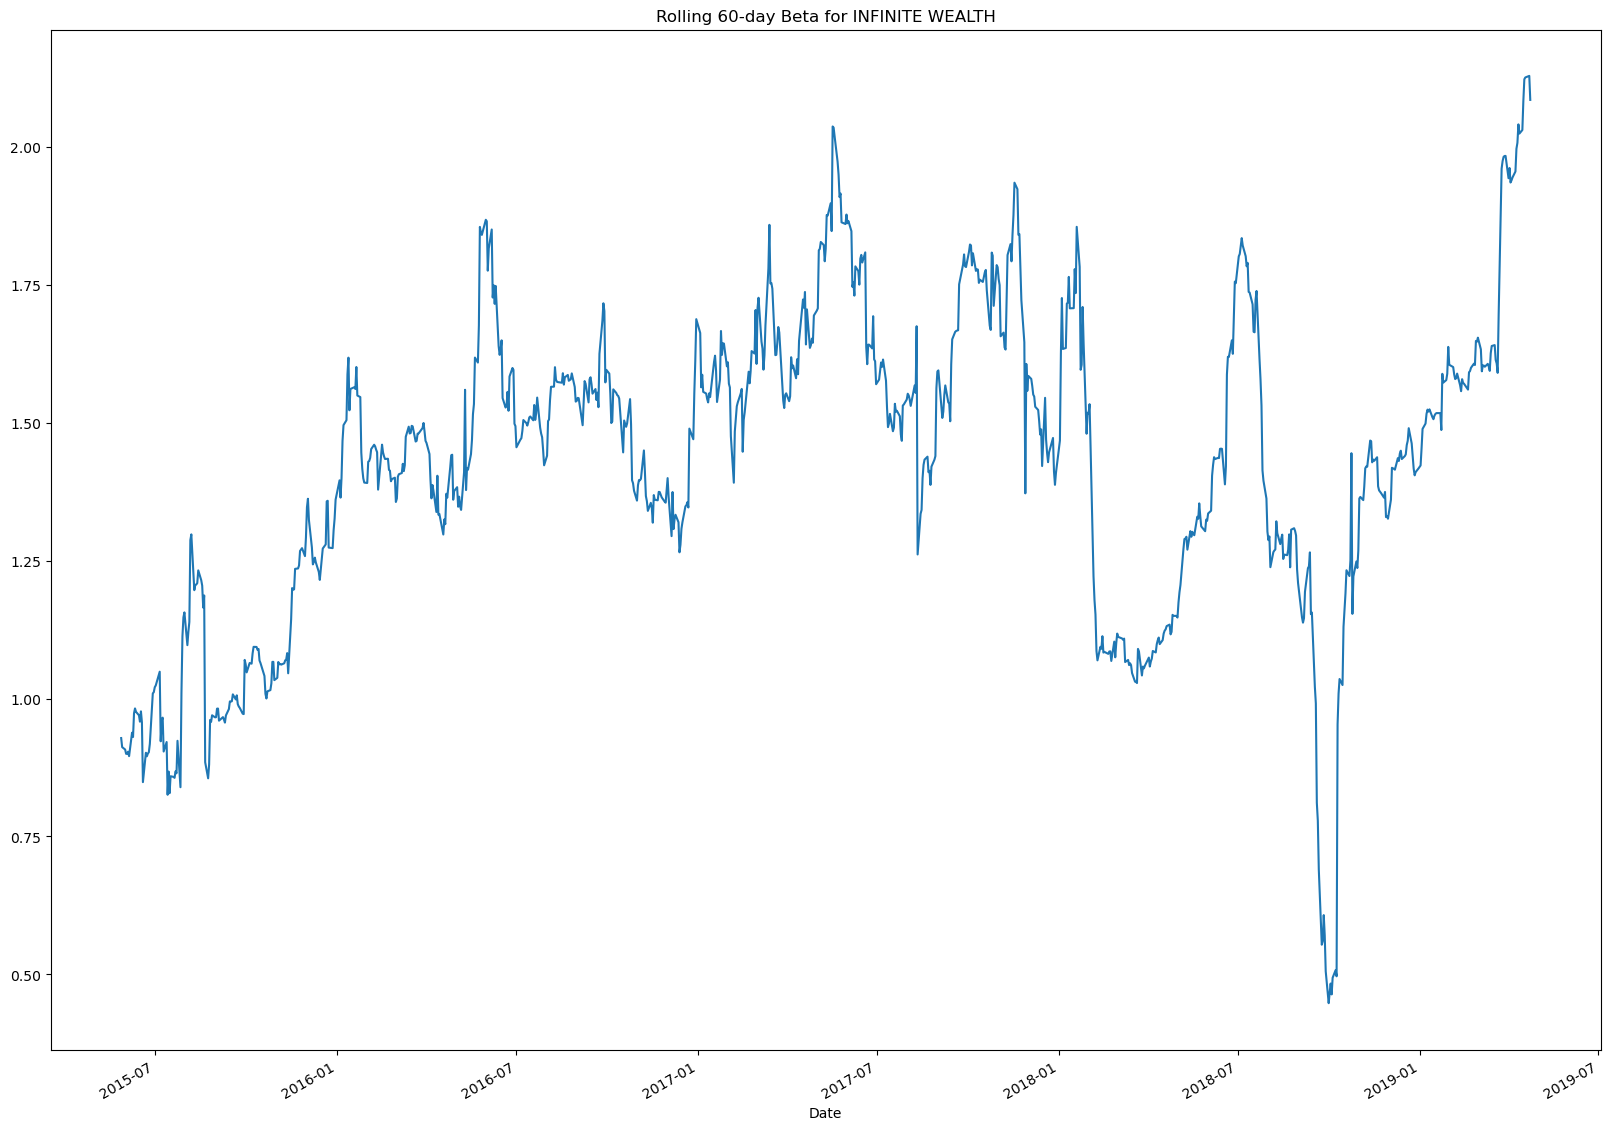

In [195]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance2 = daily_returns_personal["INFINITE WEALTH"].cov(combined_daily_returns["S&P500"])
covariance2
# Calculate variance of S&P 500
variance = combined_daily_returns["S&P500"].var()
variance
# Computing beta
infinite_wealth_beta = covariance2 / variance
rolling_covariance2 = daily_returns_personal["INFINITE WEALTH"].rolling(window=60).cov(combined_daily_returns["S&P500"])
rolling_variance = combined_daily_returns["S&P500"].rolling(window=60).var()
print(infinite_wealth_beta)
# Plot beta trend
rolling_beta2 = rolling_covariance2 / rolling_variance
rolling_beta2.plot(figsize=(20,15), title="Rolling 60-day Beta for INFINITE WEALTH")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [180]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratio = (all_portfolio_returns.mean() * 252) / (annualized_volatility_all)
all_sharpe_ratio.head(10)

SFM                0.359034
P&CO              -0.473108
TGM               -0.120425
BHI                0.629941
Algo 1             1.383268
Algo 2             0.503342
S&P500             0.656761
INFINITE WEALTH    1.129244
dtype: float64

<AxesSubplot:title={'center':'All Sharpe Ratios'}>

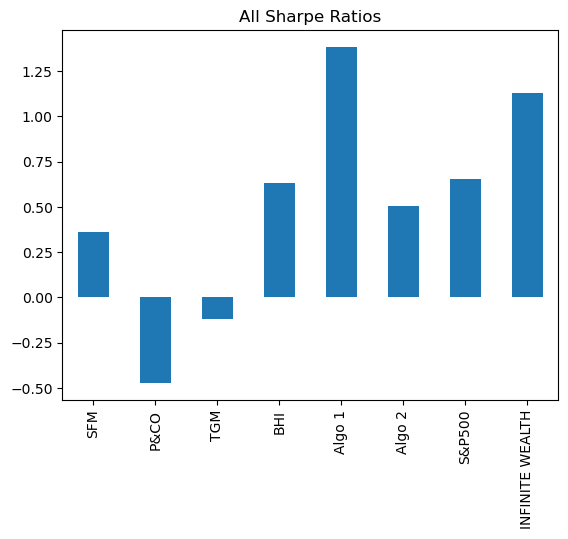

In [181]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratio.plot.bar(title="All Sharpe Ratios")

### How does your portfolio do?

My portfolio outperfromed every portfolio except the Algo 1.